In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
%matplotlib inline

In [3]:
##This is to display the numerical values as decimals instead of scientific notations like 5.951188e+08
pd.set_option('float_format', '{:f}'.format)

In [4]:
data=pd.read_csv('/Ineuron/Ineuron Intership/credit_ver10.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           110000 non-null  float64
 1   Credit Score                  110000 non-null  float64
 2   Annual Income                 110000 non-null  float64
 3   Years in current job          110000 non-null  float64
 4   Monthly Debt                  110000 non-null  float64
 5   Years of Credit History       110000 non-null  float64
 6   Months since last delinquent  110000 non-null  float64
 7   Number of Open Accounts       110000 non-null  float64
 8   Number of Credit Problems     110000 non-null  float64
 9   Current Credit Balance        110000 non-null  float64
 10  Maximum Open Credit           110000 non-null  float64
 11  Loan Status                   110000 non-null  float64
 12  Term                          110000 non-nul

We have observed while exploing data that Number of Credit Problems ,Bankruptcies & Tax Liens are higly correlated (positive) . 
All show how much bad the financial condition of the customer is currently. We will proceed with 'Number of Credit Problems' and 
drop other two features or columns. Later we can try adding these features and check if any increment in model performance.


In [6]:
data.drop(['Bankruptcies','Tax Liens'],axis=1,inplace=True)

KeyError: "['Bankruptcies' 'Tax Liens'] not found in axis"

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           110000 non-null  float64
 1   Credit Score                  110000 non-null  float64
 2   Annual Income                 110000 non-null  float64
 3   Years in current job          110000 non-null  float64
 4   Monthly Debt                  110000 non-null  float64
 5   Years of Credit History       110000 non-null  float64
 6   Months since last delinquent  110000 non-null  float64
 7   Number of Open Accounts       110000 non-null  float64
 8   Number of Credit Problems     110000 non-null  float64
 9   Current Credit Balance        110000 non-null  float64
 10  Maximum Open Credit           110000 non-null  float64
 11  Loan Status                   110000 non-null  float64
 12  Term                          110000 non-nul

In [8]:
data[['Current Loan Amount','Annual Income','Monthly Debt','Current Credit Balance']].describe()

,Current Loan Amount,Annual Income,Monthly Debt,Current Credit Balance
count,110000.000000,110000.000000,110000.000000,110000.000000
mean,312484.539240,1367203.236140,18468.526823,294282.171564
std,181241.576848,993697.100715,12195.564391,377277.271885
min,10802.000000,76627.000000,0.000000,0.000000
25%,175054.000000,868224.000000,10211.930000,112195.000000
50%,269324.000000,1182003.300000,16202.440000,209665.000000
75%,430408.000000,1631118.650000,23997.522500,367483.750000
max,789250.000000,165557393.000000,435843.280000,32878968.000000


<Figure size 1080x1008 with 0 Axes>

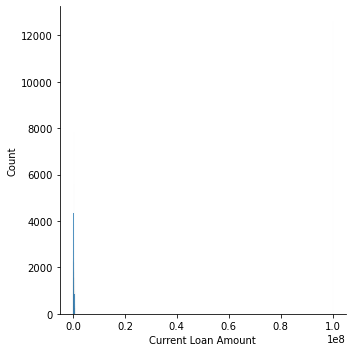

In [10]:
plt.figure(figsize=(15,14))
sns.displot(data['Current Loan Amount'])
plt.show()

In [17]:
# Just checking how many values beyond 100000 dollars
len(data[data['Current Loan Amount']>1000000.000000])

12617

In [15]:
len(data[data['Current Loan Amount']==99999999.000000])

12617

Above shows all values beyond 100000 is entered as 9999999.00000 which looks like an error . We will check the same in boxplot.

c:\users\subra\anaconda3\envs\loaneligibility\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


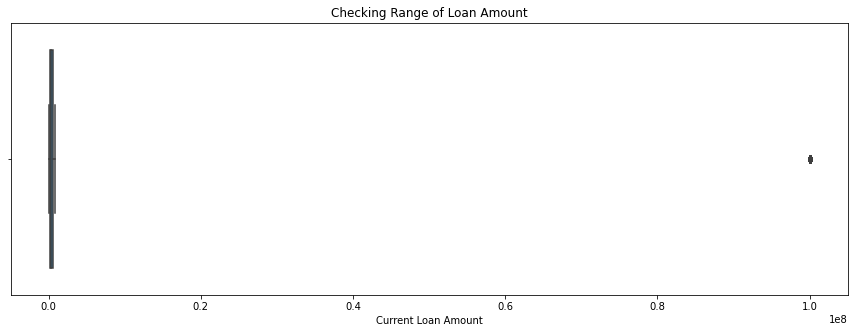

In [21]:
plt.figure(figsize=(15,5))
sns.boxplot(data['Current Loan Amount'])
plt.title('Checking Range of Loan Amount')
plt.show()

Above boxplot shows the same.This can be treated as an outlier.
We will handle this by first changing the large values to nan and then using KNNImputer.

In [9]:
##first Changing 9999999 to 0

data.replace({'Current Loan Amount':{99999999.000000:0}},inplace=True)


In [11]:
data['Current Loan Amount'].describe()

count   110000.000000
mean    312484.539240
std     181241.576848
min      10802.000000
25%     175054.000000
50%     269324.000000
75%     430408.000000
max     789250.000000
Name: Current Loan Amount, dtype: float64

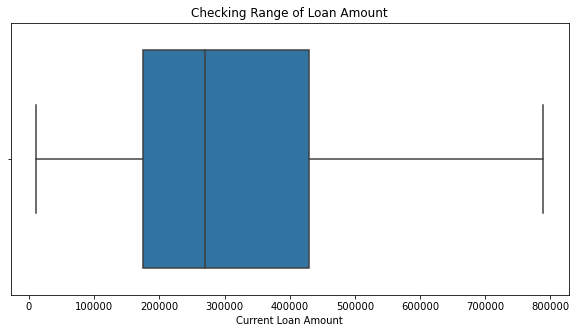

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(data['Current Loan Amount'])
plt.title('Checking Range of Loan Amount')
plt.show()

All extreme values are now converted to zero .

In [13]:
##Next will convert them to NAN so that we can impute
data['Current Loan Amount'].replace(0,np.nan,inplace=True)

In [14]:
##Checking if  null values are created.
data.isnull().sum()

Current Loan Amount             0
Credit Score                    0
Annual Income                   0
Years in current job            0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Loan Status                     0
Term                            0
Home Ownership                  0
Purpose                         0
dtype: int64

In [15]:
##getting the numerical columns together as KNNImputer will need numerical columns.
num_cols=data.select_dtypes(include=np.number)

In [16]:
data.select_dtypes(include=np.number).columns.to_list()

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Years in current job',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Loan Status']

In [17]:
impute_knn=KNNImputer()

In [18]:
trans=impute_knn.fit_transform(num_cols)

In [19]:
type(trans)

numpy.ndarray

In [20]:
imputed_data=pd.DataFrame(trans,columns=['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Years in current job',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Loan Status'])

In [21]:
imputed_data.isnull().sum()

Current Loan Amount             0
Credit Score                    0
Annual Income                   0
Years in current job            0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Loan Status                     0
dtype: int64

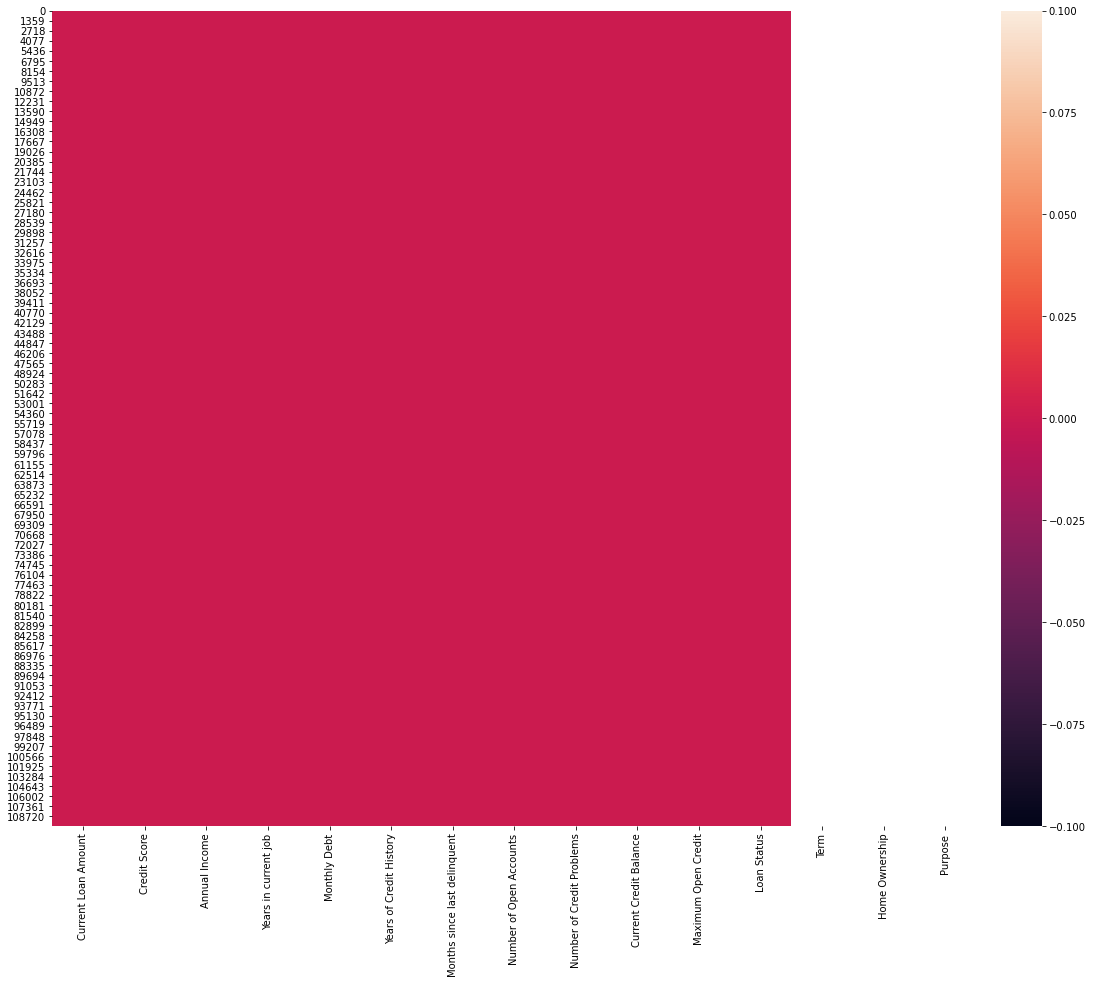

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(imputed_data.isnull(), xticklabels=data.columns)

In [22]:
imputed_data.describe()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Loan Status
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000
mean,312484.539240,716.286718,1367203.236140,6.128938,18468.526823,18.202485,16.359682,11.124491,0.168055,294282.171564,754088.666840,0.773218
std,181241.576848,26.477465,993697.100715,3.544057,12195.564391,7.015575,23.011923,5.011093,0.484389,377277.271885,8013929.854633,0.418752
min,10802.000000,585.000000,76627.000000,0.800000,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,175054.000000,704.000000,868224.000000,3.000000,10211.930000,13.500000,0.000000,8.000000,0.000000,112195.000000,273152.000000,1.000000
50%,269324.000000,721.000000,1182003.300000,6.000000,16202.440000,16.900000,0.000000,10.000000,0.000000,209665.000000,467379.000000,1.000000
75%,430408.000000,736.400000,1631118.650000,10.000000,23997.522500,21.700000,30.000000,14.000000,0.000000,367483.750000,783183.500000,1.000000
max,789250.000000,751.000000,165557393.000000,10.000000,435843.280000,70.500000,176.000000,76.000000,15.000000,32878968.000000,1539737892.000000,1.000000


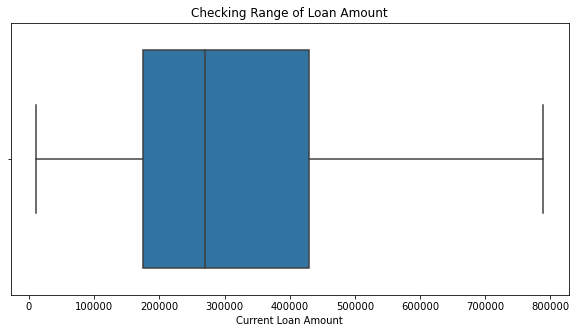

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(imputed_data['Current Loan Amount'])
plt.title('Checking Range of Loan Amount')
plt.show()

In [39]:
##Before concating dataset we will check for one categorical feature before encoding

cat_cols=data.select_dtypes(exclude=np.number)

In [40]:
data.select_dtypes(exclude=np.number).columns.to_list()

['Term', 'Home Ownership', 'Purpose']

In [42]:
len(data['Purpose'].unique())

14

In [43]:
data['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'Other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'vacation',
       'small_business', 'Medical Bills', 'wedding',
       'Educational Expenses', 'moving', 'renewable_energy'], dtype=object)

Looks like all are Unique . We will go ahead with encoding this features.
Later on we can see if further modification can be done on this categorical feature.

In [15]:
new_data=pd.concat([imputed_data,data[data.select_dtypes(exclude=np.number).columns.to_list()]],axis=1)

NameError: name 'imputed_data' is not defined

In [45]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           110000 non-null  float64
 1   Credit Score                  110000 non-null  float64
 2   Annual Income                 110000 non-null  float64
 3   Years in current job          110000 non-null  float64
 4   Monthly Debt                  110000 non-null  float64
 5   Years of Credit History       110000 non-null  float64
 6   Months since last delinquent  110000 non-null  float64
 7   Number of Open Accounts       110000 non-null  float64
 8   Number of Credit Problems     110000 non-null  float64
 9   Current Credit Balance        110000 non-null  float64
 10  Maximum Open Credit           110000 non-null  float64
 11  Loan Status                   110000 non-null  float64
 12  Term                          110000 non-nul

In [46]:
##saving the current file.
new_data.to_csv('D:\\iNeuron\\intership_2\\credit_ver10.csv',index=False)